<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Cleaned-Database" data-toc-modified-id="Import-Cleaned-Database-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Cleaned Database</a></span><ul class="toc-item"><li><span><a href="#Clean-the-df_dummies" data-toc-modified-id="Clean-the-df_dummies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clean the df_dummies</a></span></li><li><span><a href="#Correlation-Categories" data-toc-modified-id="Correlation-Categories-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlation Categories</a></span><ul class="toc-item"><li><span><a href="#Chi-Squared" data-toc-modified-id="Chi-Squared-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Chi Squared</a></span></li></ul></li></ul></li><li><span><a href="#DEF" data-toc-modified-id="DEF-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DEF</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model 1</a></span><ul class="toc-item"><li><span><a href="#Apply" data-toc-modified-id="Apply-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Apply</a></span></li><li><span><a href="#Insight-Model-1:" data-toc-modified-id="Insight-Model-1:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Insight Model 1:</a></span></li></ul></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model 2</a></span><ul class="toc-item"><li><span><a href="#Model-2---Insights" data-toc-modified-id="Model-2---Insights-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model 2 - Insights</a></span></li></ul></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model 3</a></span><ul class="toc-item"><li><span><a href="#Model-3---Insights" data-toc-modified-id="Model-3---Insights-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model 3 - Insights</a></span></li></ul></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model 4</a></span></li><li><span><a href="#Model-5" data-toc-modified-id="Model-5-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model 5</a></span><ul class="toc-item"><li><span><a href="#Model-5-1" data-toc-modified-id="Model-5-1-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Model 5-1</a></span></li></ul></li><li><span><a href="#Model-6" data-toc-modified-id="Model-6-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model 6</a></span></li><li><span><a href="#Model-7" data-toc-modified-id="Model-7-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model 7</a></span></li><li><span><a href="#Feature-Engineer" data-toc-modified-id="Feature-Engineer-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Engineer</a></span></li><li><span><a href="#Ideas" data-toc-modified-id="Ideas-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Ideas</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-11.0.1"><span class="toc-item-num">11.0.1&nbsp;&nbsp;</span>Ideas</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")
from matplotlib.colors import BASE_COLORS

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


# Import Cleaned Database
- df: cleaned data base with offer_accepted and offer (to apply the model need to drop one of them);
- df_dummies: dataframe with dummies on the categorical values (also need to drop offer or offer_accepted);

In [2]:
df = pd.read_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\python\df.xlsx')
df_dummies = pd.read_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\python\df_dummies.xlsx')

In [3]:
df.head()

,offer_accepted,reward,mailer_type,income_level,accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669,877,1095.0,1002,0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39,106,78.0,366,0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367,352,145.0,242,0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578,1760,1119.0,419,0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140,1357,982.0,365,0


In [4]:
df_dummies.head(0)

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,offer


## Clean the df_dummies
- we are going to drop the quarters and offer columns

In [5]:
df=df.drop(['q1_balance','q2_balance','q3_balance','q4_balance','offer'], axis=1)
df_dummies=df_dummies.drop(['q1_balance','q2_balance','q3_balance','q4_balance','offer'], axis=1)

## Correlation Categories

### Chi Squared

In [6]:
from scipy.stats import chi2_contingency 

In [7]:
df_cat=df.select_dtypes(exclude=np.number)
df_cat.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'overdraft_protection', 'credit_rating', 'own_your_home'],
      dtype='object')

In [8]:
# work income_level and credit_rating
feat_crosstab=pd.crosstab(df['income_level'],df['credit_rating'], margins=False)
print(chi2_contingency(feat_crosstab, correction=False))
feat_crosstab

(3.110919819078809, 0.5394378509869674, 4, array([[1526.51922222, 1497.85455556, 1501.62622222],
       [1504.59616667, 1476.34316667, 1480.06066667],
       [3039.88461111, 2982.80227778, 2990.31311111]]))


credit_rating,High,Low,Medium
income_level,,,
High,1514,1530,1482
Low,1541,1441,1479
Medium,3016,2986,3011


In [9]:
chi2_contingency(feat_crosstab, correction=False)

(3.110919819078809,
 0.5394378509869674,
 4,
 array([[1526.51922222, 1497.85455556, 1501.62622222],
        [1504.59616667, 1476.34316667, 1480.06066667],
        [3039.88461111, 2982.80227778, 2990.31311111]]))

- There is no multicollinearity between the categorical variables, since the p values are > 0.05

# DEF
- def to run a for lop with 4 methods;

In [70]:
def run_models(dataframe):
    y=df_dummies['offer_accepted_Yes']
    X_train,X_test,y_train,y_test=train_test_split(dataframe,y,test_size=0.45,random_state=40)
    classifiers = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
    models = [
          LogisticRegression(max_iter = 3000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]
    
    for i in models:
        model = i
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        print(model,'accuracy:',accuracy_score(y_test,y_pred))
        cmx=confusion_matrix(y_test,y_pred)
        disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
        disp.plot()

# Model 1
- use df_dummies drop the average_balance and offer column
- target offer_accepted_Yes

In [11]:
X1 = df_dummies.drop(['offer_accepted_Yes'], axis=1)

In [12]:
X1.head(5)

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,accounts_open,credit_cards_held,homes_owned,household_size,average_balance
0,0,0,0,0,0,0,0,0,0,1,2,1,4,1160.75
1,0,0,0,0,1,0,0,1,1,1,2,2,5,147.25
2,0,0,1,0,0,0,0,1,1,2,2,1,2,276.50
3,0,0,0,0,1,0,0,0,0,2,1,1,4,1219.00
4,0,0,0,0,1,0,0,1,1,1,2,1,6,1211.00


## Apply

LogisticRegression(max_iter=3000) accuracy: 0.9407407407407408
RandomForestClassifier(n_estimators=200, random_state=0) accuracy: 0.9353086419753086
KNeighborsClassifier() accuracy: 0.9397530864197531
GradientBoostingClassifier(random_state=0) accuracy: 0.9403703703703704


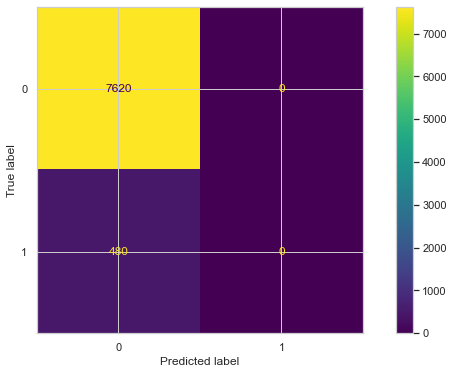

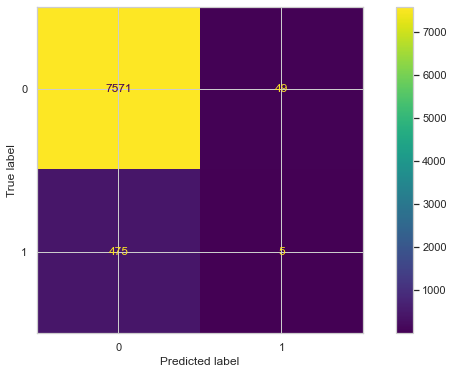

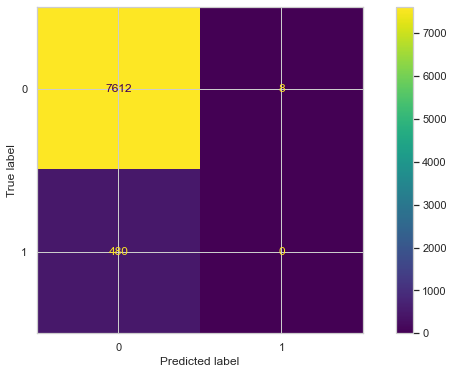

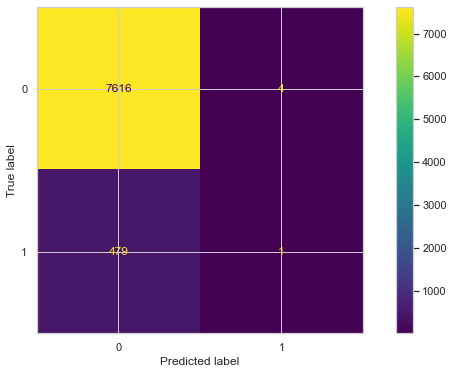

In [71]:
run_models(X1)

## Insight Model 1:
- the accuracy is high, but the model is learning better to predict 'No' than 'Yes' (imbalanced data). In this case we are going to use some resampling methods. 
- +- 17k 'No', 1k 'Yes' 

In [14]:
df_dummies.columns

Index(['offer_accepted_Yes', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Postcard', 'income_level_Low', 'income_level_Medium',
       'overdraft_protection_Yes', 'credit_rating_Low', 'credit_rating_Medium',
       'own_your_home_Yes', 'accounts_open', 'credit_cards_held',
       'homes_owned', 'household_size', 'average_balance'],
      dtype='object')

# Model 2
- drop y (offer_accepted_Yes)
- drop columns reward_Cash Back
- drop credit_cards_held

In [15]:
X2 =df_dummies.drop(['offer_accepted_Yes', 'reward_Cash Back', 'credit_cards_held'], axis=1)

LogisticRegression(max_iter=3000) accuracy: 0.9407407407407408
RandomForestClassifier(n_estimators=200, random_state=0) accuracy: 0.9290123456790124
KNeighborsClassifier() accuracy: 0.9393827160493827
GradientBoostingClassifier(random_state=0) accuracy: 0.9406172839506173


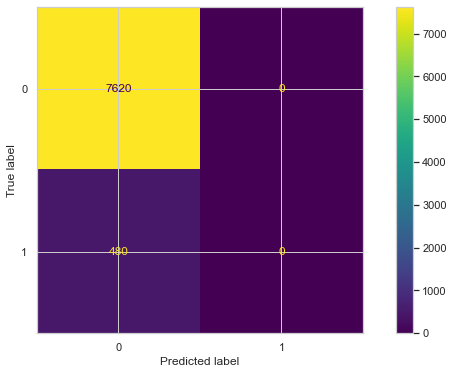

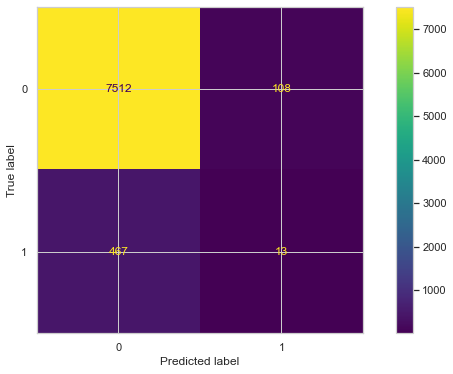

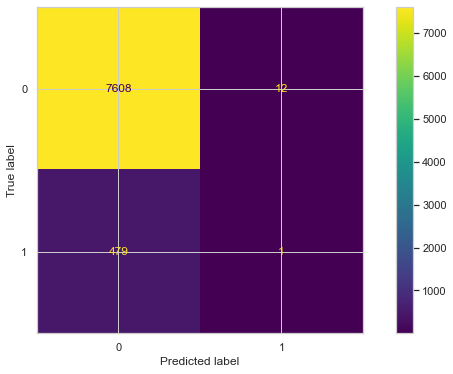

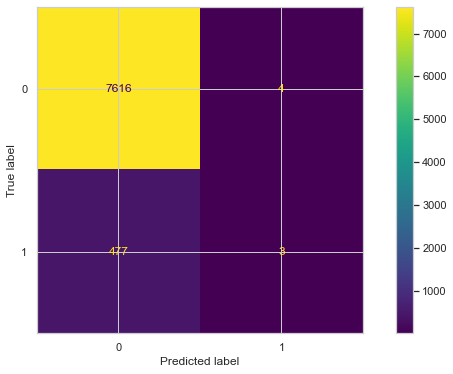

In [16]:
run_models(X2)

## Model 2 - Insights
- dropping the columns above the accuracy kept the same, but we lost some True Positives in the confusion matrix. So we decide to keep these features.

# Model 3
- drop quarters columns, offer and y (offer_accepted_Yes)

In [17]:
#X3 = df_dummies.drop(['offer_accepted_Yes','offer','q1_balance','q2_balance','q3_balance','q4_balance'], axis=1)

In [18]:
#run_models(X3)

## Model 3 - Insights
- keeping the average_balance instead of the quarters columns, the RandomForest method drop the accuracy, but in the confusion matrix the True Positives(5) and False Positives(49) got higher.
- after this model we decided to only use average_balance. So we cleaned one more time the database, dropping the quarters columns and offer.

# Model 4
- scale the numerical values:
    - StandartScaler (ok)
    - Min Max - good for KNN
    - Normalizer

In [19]:
X4 =df_dummies.drop(['offer_accepted_Yes'], axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled=scaler.fit(X4)
scaled_X4=scaled.transform(X4)

In [21]:
df_scaled_X4=pd.DataFrame(scaled_X4, columns=X4.columns)

LogisticRegression(max_iter=3000) accuracy: 0.9407407407407408
RandomForestClassifier(n_estimators=200, random_state=0) accuracy: 0.9355555555555556
KNeighborsClassifier() accuracy: 0.9364197530864198
GradientBoostingClassifier(random_state=0) accuracy: 0.9403703703703704


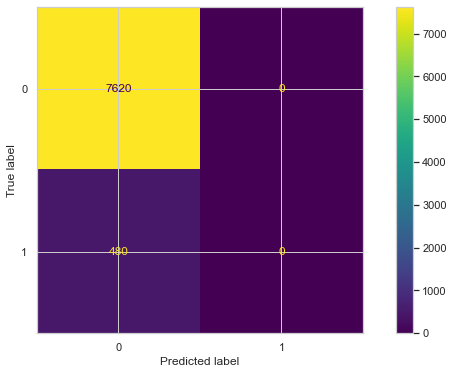

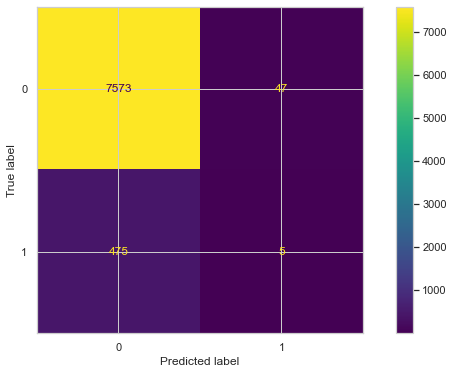

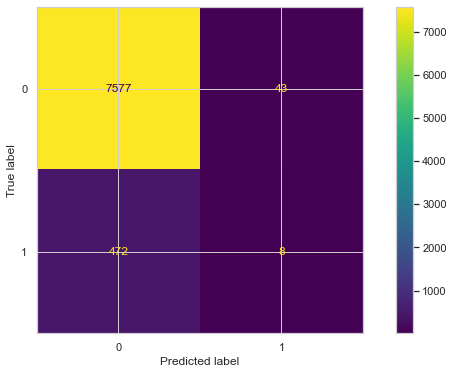

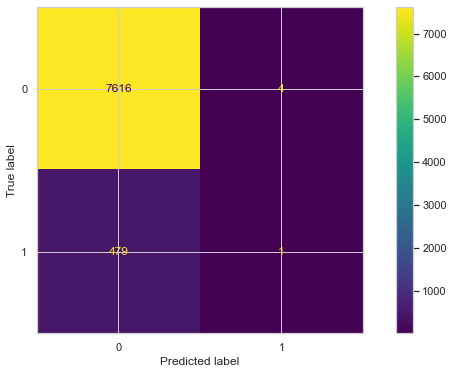

In [22]:
run_models(df_scaled_X4)

# Model 5
- apply log and square root;

In [23]:
X5 = df_dummies.drop(['offer_accepted_Yes'], axis=1)

In [24]:
X5['average_balance']=np.log(X5['average_balance'])

C:\Users\Raphael Costa\anaconda3\envs\class1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


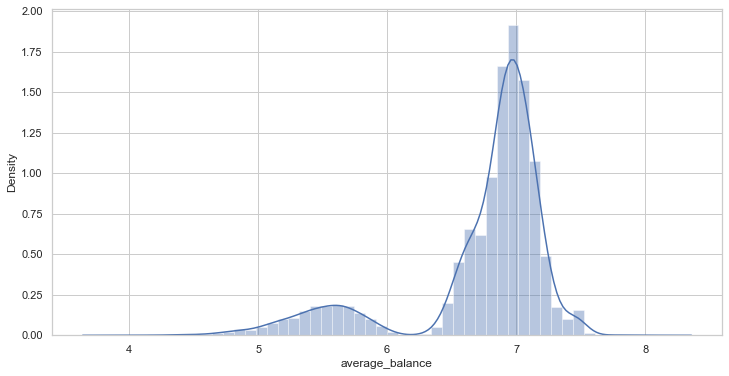

In [44]:
 sns.distplot(X5['average_balance']);

LogisticRegression(max_iter=3000) accuracy: 0.9407407407407408
RandomForestClassifier(n_estimators=200, random_state=0) accuracy: 0.9351851851851852
KNeighborsClassifier() accuracy: 0.937283950617284
GradientBoostingClassifier(random_state=0) accuracy: 0.9403703703703704


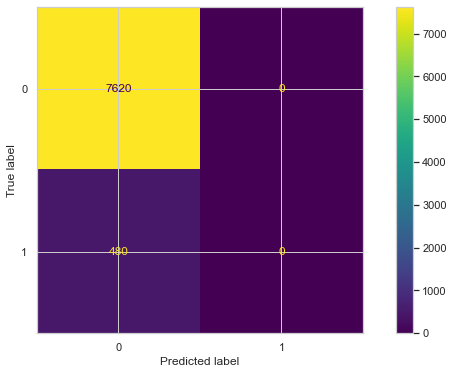

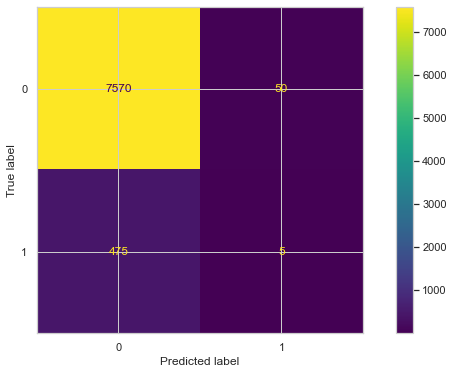

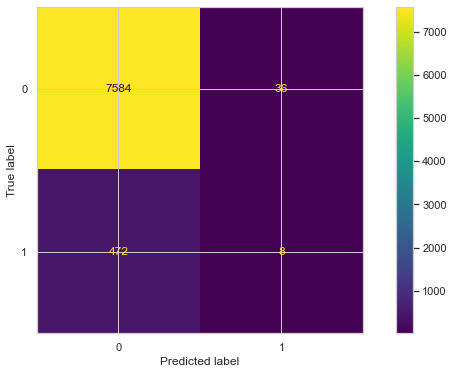

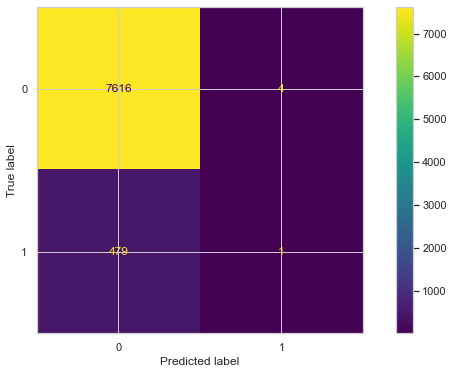

In [25]:
run_models(X5)

## Model 5-1
- use square root

# Model 6
- concat income_level and credit_rating;

In [86]:
#X6['offer_accepted']=df['offer_accepted']

In [87]:
X6.columns

Index(['reward', 'mailer_type', 'accounts_open', 'overdraft_protection',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'average_balance', 'income_credit', 'offer_accepted'],
      dtype='object')

In [58]:
X6 = df.drop(['offer_accepted'], axis=1)

In [59]:
X6['income_credit'] = X6["income_level"] +'_'+ X6["credit_rating"]
X6 = X6.drop(['income_level','credit_rating'],axis=1)

In [60]:
X6_cat = X6.select_dtypes(exclude=np.number)
X6_num = X6.select_dtypes(include=np.number)

In [61]:
X6_cat_dummies=pd.get_dummies(X6_cat, drop_first=True)

In [62]:
X6_full = pd.concat([X6_cat_dummies,X6_num],axis=1)

In [88]:
X6['income_credit'].loc[X6['offer_accepted']=='Yes'].value_counts()

Medium_Low       292
Low_Low          237
Medium_Medium    123
Low_Medium       105
High_Low         104
Medium_High       55
Low_High          46
High_Medium       43
High_High         18
Name: income_credit, dtype: int64

LogisticRegression(max_iter=3000) accuracy: 0.9407407407407408
RandomForestClassifier(n_estimators=200, random_state=0) accuracy: 0.9355555555555556
KNeighborsClassifier() accuracy: 0.9398765432098766
GradientBoostingClassifier(random_state=0) accuracy: 0.9396296296296296


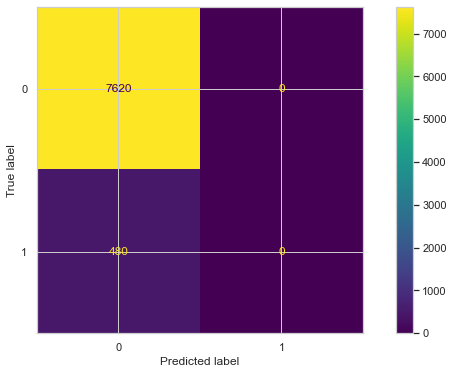

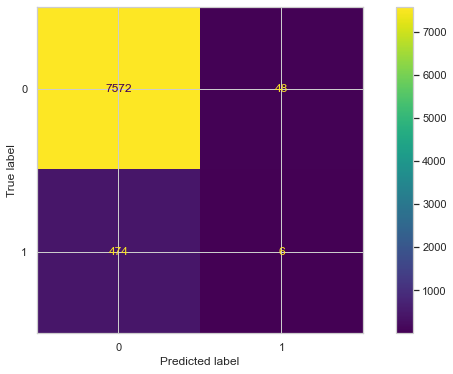

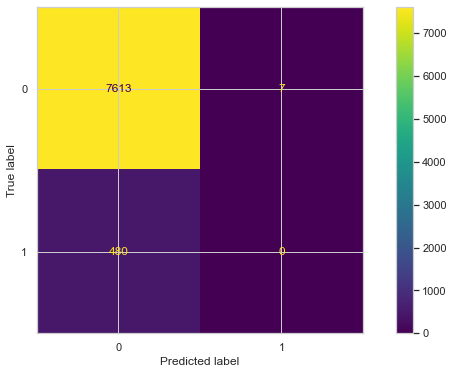

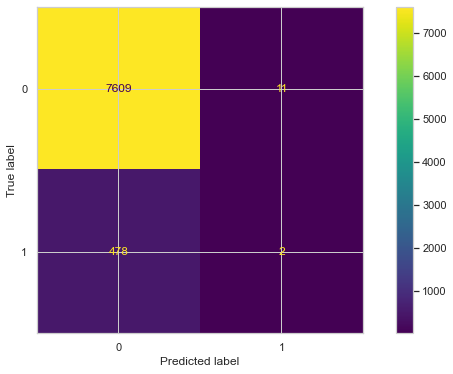

In [65]:
run_models(X6_full)

# Model 7
- use SMOTE to balance the data;

In [ ]:
X

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42) # is going to resample the data using nearest neighbort to construct synthetic samples
X_sm, y_sm = sm.fit_resample(X,y)

# Feature Engineer
- concat income_level and credit_rating:

In [26]:
inc_cred = df["income_level"] +'_'+ df["credit_rating"]
#example = df.loc[df['offer_accepted']=='Yes']
#example['income_credit'].value_counts()

- with Medium and Low income and credit rating we have almost 74% of the 'yes'.
- Best Clients : high income and high or medium credit_rating;
- Regular Client: Medium income and medium credit_rating;

# Ideas
### Ideas
- check witch scaler is going to be the best one to use it.


- drop reward_cash back - see if can we 
- drop credit_cards held
- merge in groups based in income_level and credit_rating - ok - ask if it's ok
- drop household sizes or homes_owned, check if own_your_home it's okay to keep it.
- drop accounts_open: we didnt find any strong realtions on tableau and SQL

- deal with outliers:
    - q1_balance 1 client with 3450.
        - is it good to drop him or can we keep him?
        - he didnt accepted the offer. 
        - High income and credit rating

- all of quarters columns outliers didn't accept the offer.
- most of them are high income and high or medium credit rating.

- We did the plots on python and check on sql the values.
